In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv('data-crunch/train.csv')

+ves - higher credit score, years in current job, , higher annual income, more years of credit history, Current.Credit.Balance, 'Maximum.Open.Credit', number of open accounts<br> 
-ves - current loan amount, (term proportionate with short term and long term),monthly debt, months since last delinquent, 'Number.of.Credit.Problems', bankruptries, tax liens<br>
 <br>
home ownership <br>
purpose <br>
output -> loan status

In [3]:
df

,Loan.ID,Current.Loan.Amount,Term,Credit.Score,Years.in.current.job,Home.Ownership,Annual.Income,Purpose,Monthly.Debt,Years.of.Credit.History,Months.since.last.delinquent,Number.of.Open.Accounts,Number.of.Credit.Problems,Current.Credit.Balance,Maximum.Open.Credit,Bankruptcies,Tax.Liens,Loan.Status
0,0,17879,Short Term,739.0,6 years,Home Mortgage,95357.0,Debt Consolidation,1509.82,34.4,5.0,26,0,23986,40313,0.0,0.0,1
1,1,99999999,Long Term,619.0,6 years,Rent,54406.0,Debt Consolidation,1065.45,12.7,NaN,8,0,22938,31250,0.0,0.0,1
2,3,99999999,Short Term,738.0,less than 1 year,Rent,40480.0,Medical Bills,573.47,32.7,60.0,9,1,3963,5669,1.0,0.0,1
3,4,11200,Short Term,738.0,4 years,Rent,53965.0,Debt Consolidation,1358.11,15.8,NaN,8,1,11782,25951,1.0,0.0,1
4,5,3608,Short Term,731.0,10+ years,Home Mortgage,47709.0,Home Improvements,339.93,16.1,47.0,6,0,22909,25568,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60799,84184,99999999,Short Term,725.0,3 years,Rent,52589.0,Business Loan,128.84,14.5,21.0,6,0,6160,14736,0.0,0.0,1
60800,84185,18229,Short Term,747.0,3 years,Rent,91143.0,Debt Consolidation,782.31,18.0,14.0,16,0,8328,51095,0.0,0.0,0
60801,84186,10165,Short Term,NaN,5 years,Rent,NaN,Buy a Car,156.44,8.9,NaN,10,0,5954,24400,0.0,0.0,1
60802,84187,99999999,Short Term,744.0,9 years,Rent,30450.0,Debt Consolidation,725.73,16.0,NaN,8,1,4446,7813,1.0,0.0,1


In [4]:
df.describe()

,Loan.ID,Current.Loan.Amount,Credit.Score,Annual.Income,Monthly.Debt,Years.of.Credit.History,Months.since.last.delinquent,Number.of.Open.Accounts,Number.of.Credit.Problems,Current.Credit.Balance,Maximum.Open.Credit,Bankruptcies,Tax.Liens,Loan.Status
count,60804.000000,6.080400e+04,48575.000000,4.857500e+04,60804.00000,60804.000000,28329.000000,60804.000000,60804.000000,60804.000000,6.080400e+04,60677.000000,60802.00000,60804.000000
mean,42094.538451,1.217772e+07,1104.772331,7.252253e+04,967.75930,18.235654,34.859402,11.113397,0.165861,15430.033863,3.316369e+04,0.115645,0.02870,0.759457
std,24303.803897,3.268413e+07,1526.402013,6.246093e+04,631.18808,7.030016,21.976407,4.993859,0.479679,18906.126169,2.155779e+05,0.346800,0.25697,0.427417
min,0.000000,4.910000e+02,585.000000,4.268000e+03,0.00000,3.600000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.00000,0.000000
25%,21046.750000,8.167750e+03,707.000000,4.470300e+04,536.78750,13.500000,16.000000,8.000000,0.000000,5907.750000,1.252175e+04,0.000000,0.00000,1.000000
50%,42094.500000,1.424000e+04,726.000000,6.157600e+04,851.81000,17.000000,32.000000,10.000000,0.000000,10995.000000,2.130700e+04,0.000000,0.00000,1.000000
75%,63142.250000,2.402325e+04,741.000000,8.681950e+04,1259.65250,21.700000,51.000000,14.000000,0.000000,19321.000000,3.574025e+04,0.000000,0.00000,1.000000
max,84189.000000,1.000000e+08,7510.000000,8.713547e+06,9060.85000,60.500000,176.000000,76.000000,15.000000,854602.000000,3.628434e+07,6.000000,15.00000,1.000000


#### 1.  Short tem loan payment period is less than one year and Long term loan payment period is 15 - 25 Years. So convert Current loan amount column according to their respective terms 
#### Drop Term Column

In [30]:
def func(rows):
    if(rows['Term'] == "Long Term"):
        return rows['Current.Loan.Amount']/20
    return rows['Current.Loan.Amount']

df['Current.Loan.Amount'] = df['Current.Loan.Amount'].fillna(0)
df['Current.Loan.Amount'] = df.apply(func, axis = 1) 

df.drop(['Term'], axis = 1, inplace = True)

#### 2.Fill  Credit Score NA values with mean

In [6]:
df['Credit.Score'] = df['Credit.Score'].fillna(np.mean(df['Credit.Score']))

#### 3. Remove all characters except digits in 'Years.in.Current.Job' column

In [7]:
 def func2(item):
    item =  re.sub('\D',"",str(item)) # replaces non-digit chars with ''
    return item

df['Years.in.current.job'] = df['Years.in.current.job'].apply(func2)
df['Years.in.current.job'] = pd.to_numeric(df['Years.in.current.job'])
df['Years.in.current.job'].fillna(0, inplace = True)

#### 4. Converting 'Home.Ownership' Column to Ordinal Data 

In [8]:
df['Home.Ownership'].unique()

array(['Home Mortgage', 'Rent', 'Own Home', 'HaveMortgage'], dtype=object)

In [9]:
# Order: Own Home > Rent > Home Mortgage > HaveMortgage
df['Home.Ownership'] = df['Home.Ownership'].map({'Own Home':4, 'Rent':3, 'Home Mortgage': 2, 'HaveMortgage':1})

#### 5. Fill 'Annual.Income' NA values with mean(Annual.Income/ YearsInCurrentJob) * YearsInCurrentJob

In [10]:
iy = np.mean((df['Annual.Income']).fillna(0)/(df['Years.in.current.job'].replace({0:1})))# mean of ratios of annual income per number of years in job
df['Annual.Income'] = df['Annual.Income'].fillna(iy*df['Years.in.current.job']) 

#### 6. Converting 'Purpose' Column to Categorical Data

In [11]:
df['Purpose'].unique()

array(['Debt Consolidation', 'Medical Bills', 'Home Improvements',
       'other', 'Business Loan', 'moving', 'small_business', 'Buy House',
       'Buy a Car', 'Take a Trip', 'Other', 'major_purchase', 'wedding',
       'Educational Expenses', 'vacation', 'renewable_energy'],
      dtype=object)

In [12]:
df['Purpose'][(df['Purpose']) == 'other'] = 'Other' 
pd.get_dummies(df, columns = ['Purpose'])

<ipython-input-12-19abfc9409d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Purpose'][(df['Purpose']) == 'other'] = 'Other'


,Loan.ID,Current.Loan.Amount,Term,Credit.Score,Years.in.current.job,Home.Ownership,Annual.Income,Monthly.Debt,Years.of.Credit.History,Months.since.last.delinquent,...,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,0,17879.00,Short Term,739.000000,6.0,2,95357.000000,1509.82,34.4,5.0,...,0,0,0,0,0,0,0,0,0,0
1,1,4999999.95,Long Term,619.000000,6.0,3,54406.000000,1065.45,12.7,NaN,...,0,0,0,0,0,0,0,0,0,0
2,3,99999999.00,Short Term,738.000000,1.0,3,40480.000000,573.47,32.7,60.0,...,0,1,0,0,0,0,0,0,0,0
3,4,11200.00,Short Term,738.000000,4.0,3,53965.000000,1358.11,15.8,NaN,...,0,0,0,0,0,0,0,0,0,0
4,5,3608.00,Short Term,731.000000,10.0,2,47709.000000,339.93,16.1,47.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60799,84184,99999999.00,Short Term,725.000000,3.0,3,52589.000000,128.84,14.5,21.0,...,0,0,0,0,0,0,0,0,0,0
60800,84185,18229.00,Short Term,747.000000,3.0,3,91143.000000,782.31,18.0,14.0,...,0,0,0,0,0,0,0,0,0,0
60801,84186,10165.00,Short Term,1104.772331,5.0,3,93855.663205,156.44,8.9,NaN,...,0,0,0,0,0,0,0,0,0,0
60802,84187,99999999.00,Short Term,744.000000,9.0,3,30450.000000,725.73,16.0,NaN,...,0,0,0,0,0,0,0,0,0,0


#### 7. Fill remaining NA cells with 0

In [13]:
df.fillna(0, inplace = True)

#### 8. Check for Outliers

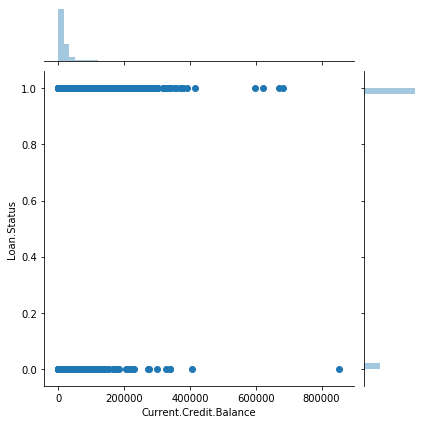

In [14]:
sns.jointplot(x = "Current.Credit.Balance", y = "Loan.Status", data = df)

<ipython-input-15-7a9e07f32ecb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Current.Credit.Balance'][(df['Current.Credit.Balance']) > 6 * tmp] = 6*tmp


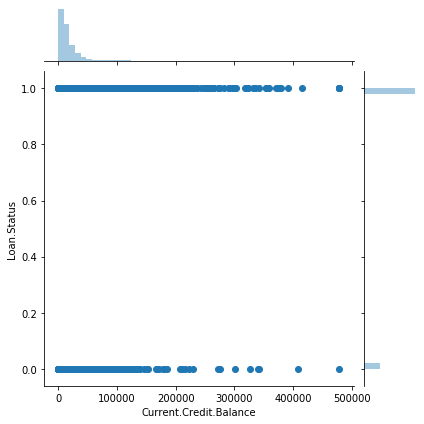

In [15]:
tmp = np.percentile(df['Current.Credit.Balance'],99)
df['Current.Credit.Balance'][(df['Current.Credit.Balance']) > 6 * tmp] = 6*tmp
sns.jointplot(x = "Current.Credit.Balance", y = "Loan.Status", data = df)

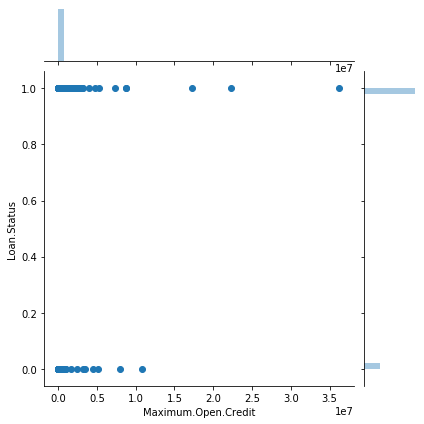

In [16]:
sns.jointplot(x= "Maximum.Open.Credit",y="Loan.Status",data=df)

<ipython-input-17-5267c478c981>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Maximum.Open.Credit'][(df['Maximum.Open.Credit']) > 6*tmp] = 6*tmp


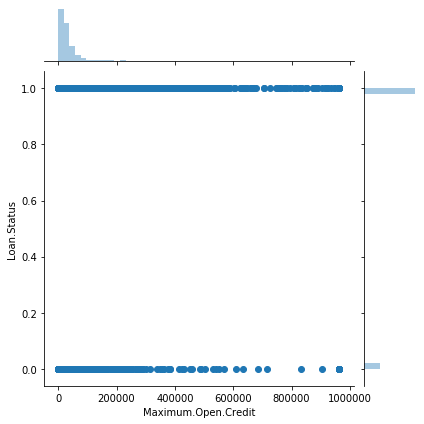

In [17]:
tmp = np.percentile(df['Maximum.Open.Credit'],99)
df['Maximum.Open.Credit'][(df['Maximum.Open.Credit']) > 6*tmp] = 6*tmp
sns.jointplot(x= "Maximum.Open.Credit",y="Loan.Status",data=df)

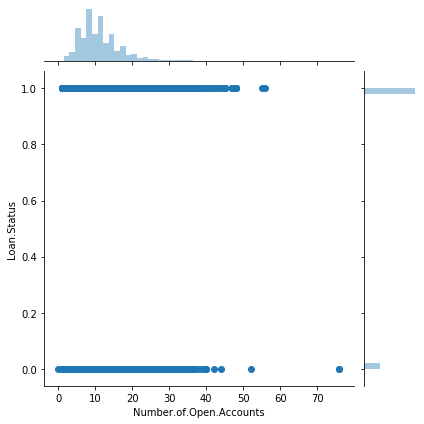

In [18]:
sns.jointplot(x= "Number.of.Open.Accounts",y="Loan.Status",data=df)

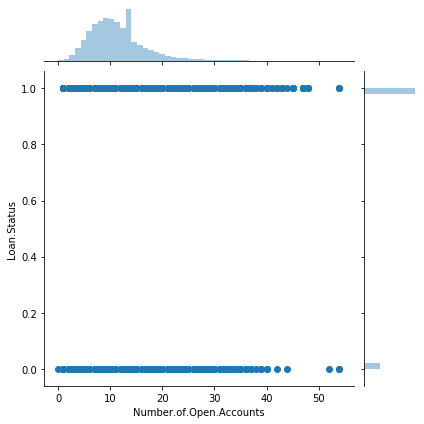

In [32]:
tmp = np.percentile(df['Number.of.Open.Accounts'],99)
df['Number.of.Open.Accounts'][(df['Number.of.Open.Accounts']) > 3*tmp] = 3*tmp
sns.jointplot(x = "Number.of.Open.Accounts",y="Loan.Status",data=df)

#### 9. Check for correlations

In [19]:
df.corr()

,Loan.ID,Current.Loan.Amount,Credit.Score,Years.in.current.job,Home.Ownership,Annual.Income,Monthly.Debt,Years.of.Credit.History,Months.since.last.delinquent,Number.of.Open.Accounts,Number.of.Credit.Problems,Current.Credit.Balance,Maximum.Open.Credit,Bankruptcies,Tax.Liens,Loan.Status
Loan.ID,1.000000,0.000440,0.005477,0.001683,0.001382,0.006459,0.003932,0.001031,0.002932,0.000551,0.005857,0.001499,0.002886,0.003460,0.000274,0.004946
Current.Loan.Amount,0.000440,1.000000,-0.091103,-0.009208,0.002273,-0.035627,-0.026028,0.013025,-0.008671,-0.008281,0.008328,-0.011832,0.003801,0.010344,0.001420,0.187221
Credit.Score,0.005477,-0.091103,1.000000,-0.008934,0.020884,-0.010289,-0.002433,-0.017460,-0.009853,0.002674,-0.001587,-0.005777,-0.014666,-0.007319,0.009165,-0.406291
Years.in.current.job,0.001683,-0.009208,-0.008934,1.000000,-0.146411,0.278992,0.148858,0.156298,0.043455,0.064007,0.014572,0.105899,0.062035,0.013681,0.004954,0.020379
Home.Ownership,0.001382,0.002273,0.020884,-0.146411,1.000000,-0.139769,-0.175786,-0.126304,-0.017182,-0.109304,0.003933,-0.127219,-0.090280,0.002895,0.001843,-0.039373
Annual.Income,0.006459,-0.035627,-0.010289,0.278992,-0.139769,1.000000,0.363527,0.144232,0.020698,0.114008,-0.008809,0.243116,0.172279,-0.030173,0.028429,0.031904
Monthly.Debt,0.003932,-0.026028,-0.002433,0.148858,-0.175786,0.363527,1.000000,0.198528,0.008503,0.411829,-0.057784,0.495692,0.278905,-0.077685,0.015246,-0.009794
Years.of.Credit.History,0.001031,0.013025,-0.017460,0.156298,-0.126304,0.144232,0.198528,1.000000,0.087869,0.129628,0.060772,0.216833,0.181465,0.068539,0.015054,0.030603
Months.since.last.delinquent,0.002932,-0.008671,-0.009853,0.043455,-0.017182,0.020698,0.008503,0.087869,1.000000,0.031705,0.079737,-0.071890,-0.064136,0.052776,0.030946,0.013718
Number.of.Open.Accounts,0.000551,-0.008281,0.002674,0.064007,-0.109304,0.114008,0.411829,0.129628,0.031705,1.000000,-0.016702,0.233580,0.230857,-0.025044,0.006448,-0.016107


#### 10. Changing Index

In [20]:
df = df.set_index(['Loan.ID'])

In [21]:
Y = df['Loan.Status']
X = df.drop(['Loan.Status'], axis = 1)

### Summarizing

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import re

def convert_loan_amount_acc_term(df):
    
    def func(rows):
        if(rows['Term'] == "Long Term"):
            return rows['Current.Loan.Amount']/20
        return rows['Current.Loan.Amount']

    df['Current.Loan.Amount'] = df['Current.Loan.Amount'].fillna(0)
    df['Current.Loan.Amount'] = df.apply(func, axis = 1) 
    return df

def extract_digits(df):
    def func2(item):
        item =  re.sub('\D',"",str(item))
        return item

    df['Years.in.current.job'] = df['Years.in.current.job'].apply(func2)
    df['Years.in.current.job'] = pd.to_numeric(df['Years.in.current.job'])
    df['Years.in.current.job'].fillna(0, inplace = True)

    return df

def fill_annual_income_nan(df):
    iy = np.mean((df['Annual.Income']).fillna(0)/(df['Years.in.current.job'].replace({0:1})))# mean of ratios of annual income per number of years in job
    df['Annual.Income'] = df['Annual.Income'].fillna(iy*df['Years.in.current.job']) 
    #print(iy)
    return df
    
def convert_months_to_year(df):
    df['Months.since.last.delinquent'] = df['Months.since.last.delinquent'].fillna(0)
    df['Years.since.last.delinquent'] = df['Months.since.last.delinquent']/12
    df.drop(['Months.since.last.delinquent'], axis = 1, inplace = True)
    return df

def fill_credit_score_nan(df):
    df['Credit.Score'] = df['Credit.Score'].fillna(np.mean(df['Credit.Score']))
    return df
    
def handling_categorical_data(df):
    #df['Purpose'].unique()
    df['Purpose'][(df['Purpose']) == 'other'] = 'Other' 
    
    return pd.get_dummies(df, columns = ['Purpose'])

def handling_ordinal_data(df):
    #df['Home.Ownership'].unique()
    df['Home.Ownership'] = df['Home.Ownership'].map({'Own Home':4, 'Rent':3, 'Home Mortgage': 2, 'HaveMortgage':1})
    
    return df
    
def pre_processing(df):
    df = convert_loan_amount_acc_term(df)
    df.drop(['Term'], axis = 1, inplace = True)
    df = extract_digits(df)
    df = fill_annual_income_nan(df)
    #df = convert_months_to_year(df)
    df = fill_credit_score_nan(df)
    df = handling_categorical_data(df)
    df = handling_ordinal_data(df)
    df.fillna(0, inplace = True)
    
    return df

def remove_outliers(df):
    #sns.jointplot(x= "Current.Credit.Balance",y="Loan.Status",data=df)
    tmp = np.percentile(df['Current.Credit.Balance'],99)
    df['Current.Credit.Balance'][(df['Current.Credit.Balance']) > 6 * tmp] = 6*tmp
    
    #sns.jointplot(x= "Maximum.Open.Credit",y="Loan.Status",data=df)
    tmp = np.percentile(df['Maximum.Open.Credit'],99)
    df['Maximum.Open.Credit'][(df['Maximum.Open.Credit']) > 6*tmp] = 6*tmp
    
    #sns.jointplot(x = "Number.of.Open.Accounts",y="Loan.Status",data=df)
    tmp = np.percentile(df['Number.of.Open.Accounts'],99)
    df['Number.of.Open.Accounts'][(df['Number.of.Open.Accounts']) > 3*tmp] = 3*tmp
    

    return df

In [2]:
def get_data():
    df = pd.read_csv('data-crunch/train.csv')
    df = pre_processing(df)
    df = remove_outliers(df)
    df = df.set_index(['Loan.ID'])
    Y = df['Loan.Status']
    X = df.drop(['Loan.Status'], axis = 1)
    return X,Y

X, Y = get_data()
X

<ipython-input-1-5986ab36782b>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Purpose'][(df['Purpose']) == 'other'] = 'Other'
<ipython-input-1-5986ab36782b>:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Current.Credit.Balance'][(df['Current.Credit.Balance']) > 6 * tmp] = 6*tmp
<ipython-input-1-5986ab36782b>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Maximum.Open.Credit'][(df['Maximum.Open.Credit']) > 6*tmp] = 

,Current.Loan.Amount,Credit.Score,Years.in.current.job,Home.Ownership,Annual.Income,Monthly.Debt,Years.of.Credit.History,Months.since.last.delinquent,Number.of.Open.Accounts,Number.of.Credit.Problems,...,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
Loan.ID,,,,,,,,,,,,,,,,,,,,,
0,17879.00,739.000000,6.0,2,95357.000000,1509.82,34.4,5.0,26,0,...,0,0,0,0,0,0,0,0,0,0
1,4999999.95,619.000000,6.0,3,54406.000000,1065.45,12.7,0.0,8,0,...,0,0,0,0,0,0,0,0,0,0
3,99999999.00,738.000000,1.0,3,40480.000000,573.47,32.7,60.0,9,1,...,0,1,0,0,0,0,0,0,0,0
4,11200.00,738.000000,4.0,3,53965.000000,1358.11,15.8,0.0,8,1,...,0,0,0,0,0,0,0,0,0,0
5,3608.00,731.000000,10.0,2,47709.000000,339.93,16.1,47.0,6,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84184,99999999.00,725.000000,3.0,3,52589.000000,128.84,14.5,21.0,6,0,...,0,0,0,0,0,0,0,0,0,0
84185,18229.00,747.000000,3.0,3,91143.000000,782.31,18.0,14.0,16,0,...,0,0,0,0,0,0,0,0,0,0
84186,10165.00,1104.772331,5.0,3,93855.663205,156.44,8.9,0.0,10,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2

# bestfeatures = SelectKBest(score_func=chi2, k=25)
# fit = bestfeatures.fit(X,Y)
# dfscores = pd.DataFrame(fit.scores_)
# dfcolumns = pd.DataFrame(X.columns)
# featureScores = pd.concat([dfcolumns,dfscores],axis=1)
# featureScores.columns = ['Features','Score']  #naming the dataframe columns
# #print(featureScores.nlargest(25,'Score'))  #print 20 best features
# bestcolumns = featureScores.nlargest(25,'Score').Features
# bestcolumns

0              Current.Loan.Amount
1                     Credit.Score
11             Maximum.Open.Credit
4                    Annual.Income
10          Current.Credit.Balance
5                     Monthly.Debt
7     Months.since.last.delinquent
6          Years.of.Credit.History
2             Years.in.current.job
14           Purpose_Business Loan
8          Number.of.Open.Accounts
26          Purpose_small_business
13                       Tax.Liens
16               Purpose_Buy a Car
19       Purpose_Home Improvements
3                   Home.Ownership
12                    Bankruptcies
24                  Purpose_moving
20           Purpose_Medical Bills
15               Purpose_Buy House
21                   Purpose_Other
18    Purpose_Educational Expenses
28                 Purpose_wedding
27                Purpose_vacation
25        Purpose_renewable_energy
Name: Features, dtype: object

In [4]:
# X = X[bestcolumns]
# X

,Current.Loan.Amount,Credit.Score,Maximum.Open.Credit,Annual.Income,Current.Credit.Balance,Monthly.Debt,Months.since.last.delinquent,Years.of.Credit.History,Years.in.current.job,Purpose_Business Loan,...,Home.Ownership,Bankruptcies,Purpose_moving,Purpose_Medical Bills,Purpose_Buy House,Purpose_Other,Purpose_Educational Expenses,Purpose_wedding,Purpose_vacation,Purpose_renewable_energy
Loan.ID,,,,,,,,,,,,,,,,,,,,,
0,17879.00,739.000000,40313.0,95357.000000,23986.0,1509.82,5.0,34.4,6.0,0,...,2,0.0,0,0,0,0,0,0,0,0
1,4999999.95,619.000000,31250.0,54406.000000,22938.0,1065.45,0.0,12.7,6.0,0,...,3,0.0,0,0,0,0,0,0,0,0
3,99999999.00,738.000000,5669.0,40480.000000,3963.0,573.47,60.0,32.7,1.0,0,...,3,1.0,0,1,0,0,0,0,0,0
4,11200.00,738.000000,25951.0,53965.000000,11782.0,1358.11,0.0,15.8,4.0,0,...,3,1.0,0,0,0,0,0,0,0,0
5,3608.00,731.000000,25568.0,47709.000000,22909.0,339.93,47.0,16.1,10.0,0,...,2,0.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84184,99999999.00,725.000000,14736.0,52589.000000,6160.0,128.84,21.0,14.5,3.0,1,...,3,0.0,0,0,0,0,0,0,0,0
84185,18229.00,747.000000,51095.0,91143.000000,8328.0,782.31,14.0,18.0,3.0,0,...,3,0.0,0,0,0,0,0,0,0,0
84186,10165.00,1104.772331,24400.0,93855.663205,5954.0,156.44,0.0,8.9,5.0,0,...,3,0.0,0,0,0,0,0,0,0,0


#### Splitting DataSet into training and testing

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2)

#### Check for dataset imbalance

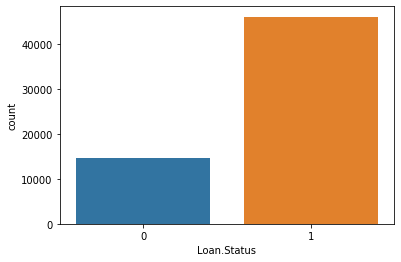

In [26]:
sns.countplot(x="Loan.Status",data = df)

#### Since Outcomes are not balanced, apply techniques ike random forrest, bagging, boosting that deal with imbalanced datasets 

### RandomForrestClassifier

In [6]:
from sklearn.ensemble import RandomForestClassifier
import pickle

rf_clf = RandomForestClassifier()
rf_clf.fit(x_train,y_train)
print("RF Test Score: ",rf_clf.score(x_test, y_test))

saved_rf_model = pickle.dumps(rf_clf)

RF Test Score:  0.8056080914398487


### LogisticRegression

In [8]:
from sklearn.linear_model import LogisticRegression
import pickle

lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
print("LR Test Score: ", lr_model.score(x_test, y_test))

saved_lr_model = pickle.dumps(lr_model)

LR Test Score:  0.8018255077707426


/home/vamsi/anaconda3/envs/v1/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### EasyEnsembleClassifier

In [9]:
from imblearn.ensemble import EasyEnsembleClassifier
import pickle

eec_model = EasyEnsembleClassifier(random_state = 42)
eec_model.fit(x_train, y_train)
print("EEC Test Score: ", eec_model.score(x_test, y_test))

saved_eec_model = pickle.dumps(eec_model)

EEC Test Score:  0.6849765644272675


In [34]:
df_test = pd.read_csv('data-crunch/test.csv')

df_test = pre_processing(df_test)
loan_ids = df_test['Loan.ID'].tolist()
df_test = df_test.drop(['Loan.Status'], axis = 1)
df_test = df_test.set_index(['Loan.ID'])


<ipython-input-28-a1e2a87b9cdd>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Purpose'][(df['Purpose']) == 'other'] = 'Other'


In [ ]:
rf_clf = pickle.loads(saved_rf_model)

y_pred = rf_clf.predict(df_test)
loan_status = y_pred.tolist()

print(loan_status)

import csv

submission_file = 'Submission.csv'
fields = ['Loan.ID', 'Loan.Status']

with open(submission_file, 'w') as f:
    csvwriter = csv.writer(f)
    
    csvwriter.writerow(fields)
    for i,j in zip(loan_ids, loan_status):
        csvwriter.writerow([i,j])
    
f.close()

In [ ]:
lr_clf = pickle.loads(saved_lr_model)

y_pred = rf_clf.predict(df_test)
loan_status = y_pred.tolist()

print(loan_status)

import csv

submission_file = 'Submission.csv'
fields = ['Loan.ID', 'Loan.Status']

with open(submission_file, 'w') as f:
    csvwriter = csv.writer(f)
    
    csvwriter.writerow(fields)
    for i,j in zip(loan_ids, loan_status):
        csvwriter.writerow([i,j])
    
f.close()

In [ ]:
eec_clf = pickle.loads(saved_eec_model)

y_pred = rf_clf.predict(df_test)
loan_status = y_pred.tolist()

print(loan_status)


import csv

submission_file = 'Submission.csv'
fields = ['Loan.ID', 'Loan.Status']

with open(submission_file, 'w') as f:
    csvwriter = csv.writer(f)
    
    csvwriter.writerow(fields)
    for i,j in zip(loan_ids, loan_status):
        csvwriter.writerow([i,j])
    
f.close()